# Netflix Data Analysis Project


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##  Data Cleaning

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')

df['country'] = df['country'].astype(str).str.strip().fillna('Unknown')
df['cast'] = df['cast'].astype(str).str.strip().fillna('Unknown')
df['director'] = df['director'].astype(str).str.strip().fillna('Unknown')
df['rating'] = df['rating'].astype(str).str.strip().fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].astype(str).str.strip().fillna(df['duration'].mode()[0])

df['year_added'] = df['date_added'].dt.year

##  Titles Added Over Time

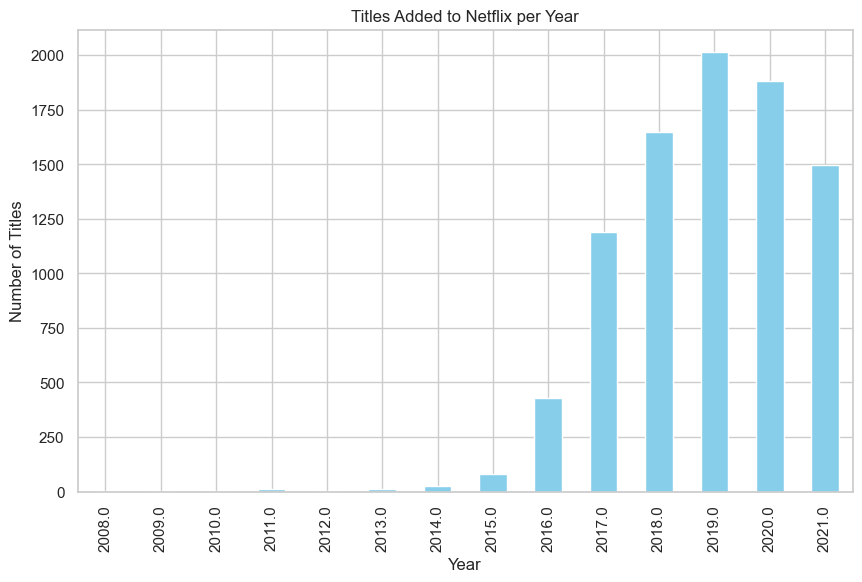

In [13]:
titles_per_year = df['year_added'].value_counts().sort_index()
titles_per_year.plot(kind='bar', color='skyblue')
plt.title("Titles Added to Netflix per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

##  Content Type Distribution

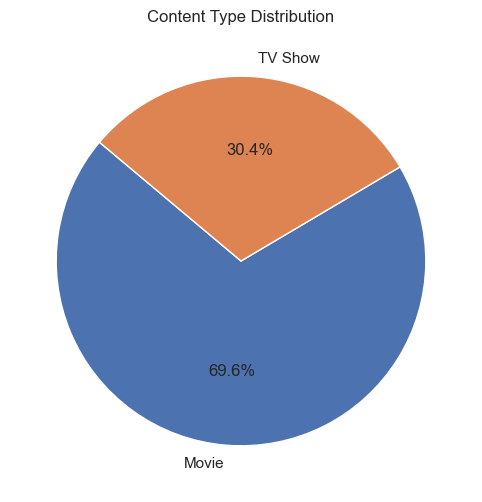

In [15]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Content Type Distribution")
plt.ylabel("")
plt.show()

##  Top 10 Content-Producing Countries

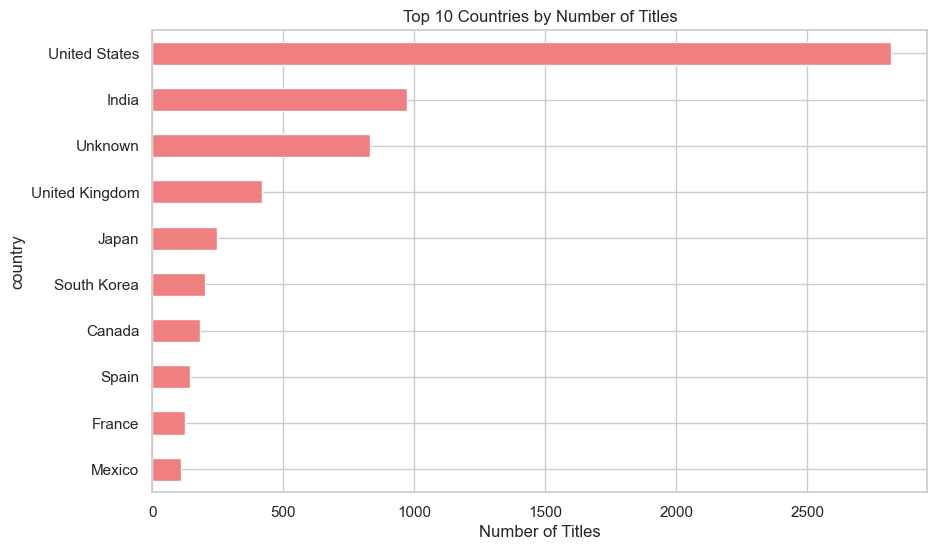

In [16]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='lightcoral')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()

##  Top 10 Genres on Netflix

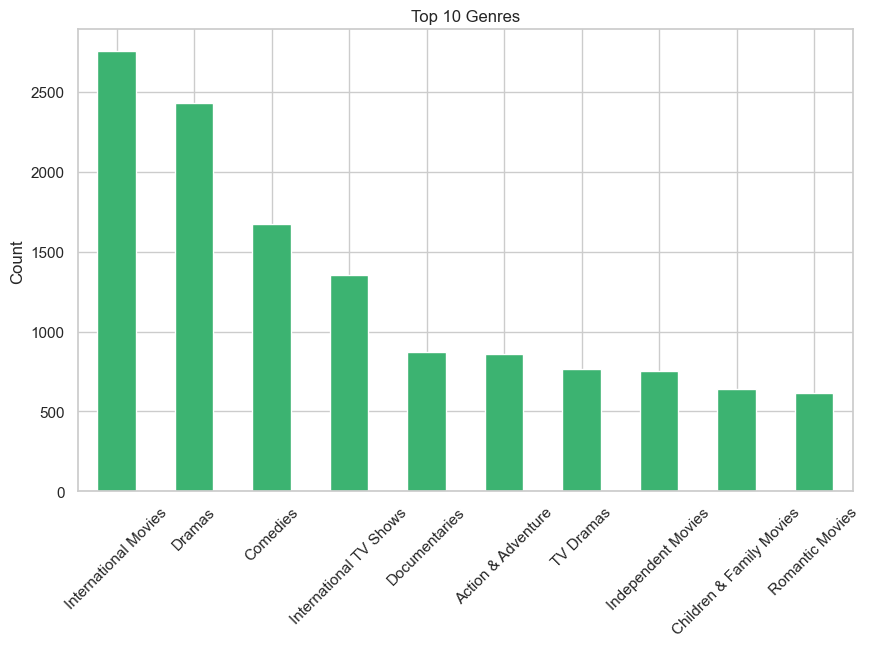

In [8]:
genres_series = df['listed_in'].str.split(', ')
genres_flat = [genre for sublist in genres_series.dropna() for genre in sublist]
genre_counts = Counter(genres_flat)
top_genres = pd.Series(dict(genre_counts)).sort_values(ascending=False).head(10)
top_genres.plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##  Movie Duration Distribution

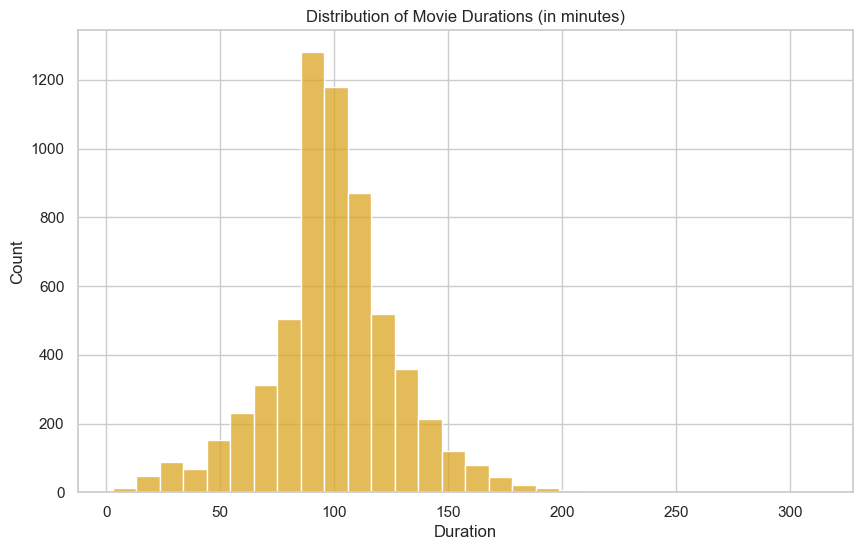

In [9]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_mins'] = movies['duration'].str.extract('(\\d+)').astype(float)
sns.histplot(movies['duration_mins'].dropna(), bins=30, color='goldenrod')
plt.title("Distribution of Movie Durations (in minutes)")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()